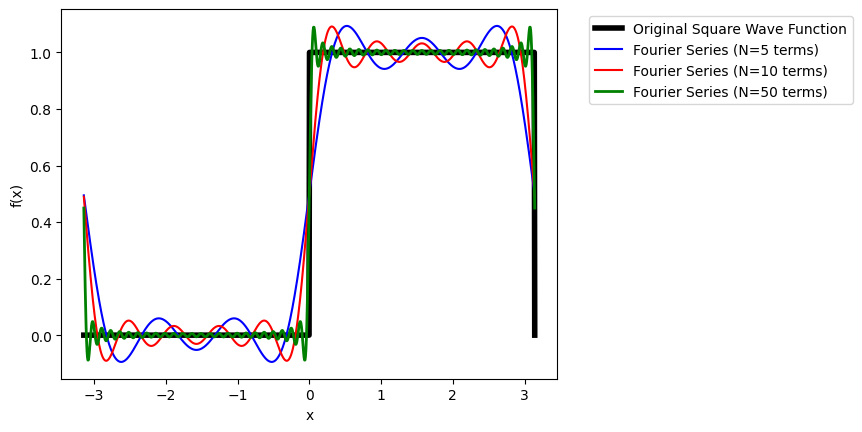

In [4]:
# Fourier_Sines.ipynb
# Fourier Series Approximation of a Square Wave Function
# The following is my original code for the Fourier series approximation
import numpy as np
import matplotlib.pyplot as plt
# Define the function (example: square wave)
def square_wave(x, period):
  return np.where(x % period < period / 2, 1, 0)
# Function parameters
period = 2*np.pi # period of the square wave function
L = period / 2  # half-period for domain [-L, L) 
# Number of terms in the series (controls accuracy)  
N = 5
N_2 = 10
N_4 = 50 
# Define x points for calculating the Fourier coefficients
x = np.linspace(-L, L, 1000)
# Calculate Fourier coefficients (an and bn) for the square wave function 
a0 = 1/period * np.trapz(square_wave(x, period), x=x) # Average value of the function 
an = [2/period * np.trapz(square_wave(x, period) * np.cos(n*np.pi*x/L), x=x) for n in range(1, N+1)]
bn = [2/period * np.trapz(square_wave(x, period) * np.sin(n*np.pi*x/L), x=x) for n in range(1, N+1)]
an_2 = [2/period * np.trapz(square_wave(x, period) * np.cos(n*np.pi*x/L), x=x) for n in range(1, N_2+1)]
bn_2 = [2/period * np.trapz(square_wave(x, period) * np.sin(n*np.pi*x/L), x=x) for n in range(1, N_2+1)]
an_4 = [2/period * np.trapz(square_wave(x, period) * np.cos(n*np.pi*x/L), x=x) for n in range(1, N_4+1)]
bn_4 = [2/period * np.trapz(square_wave(x, period) * np.sin(n*np.pi*x/L), x=x) for n in range(1, N_4+1)]
# Define x points for plotting the Fourier series approximation
x_plot = np.linspace(-L, L, 1000)
# Reconstruct the Fourier series approximation using the calculated coefficients 
fourier_series = a0 + sum(an[n-1] * np.cos(n*np.pi*x_plot/L) + bn[n-1] * np.sin(n*np.pi*x_plot/L) for n in range(1, N+1))
fourier_series_2 = a0 + sum(an_2[n-1] * np.cos(n*np.pi*x_plot/L) + bn_2[n-1] * np.sin(n*np.pi*x_plot/L) for n in range(1, N_2+1))
fourier_series_4 = a0 + sum(an_4[n-1] * np.cos(n*np.pi*x_plot/L) + bn_4[n-1] * np.sin(n*np.pi*x_plot/L) for n in range(1, N_4+1))
# Plot the original function and its Fourier series approximation 
plt.plot(x_plot, square_wave(x_plot, period), label='Original Square Wave Function', linewidth=4, color='black') # Original function 
plt.plot(x_plot, fourier_series, label='Fourier Series (N=%d terms)' % N, color='blue')
plt.plot(x_plot, fourier_series_2, label='Fourier Series (N=%d terms)' % N_2, color='red')
plt.plot(x_plot, fourier_series_4, label='Fourier Series (N=%d terms)' % N_4, linewidth=2, color='green')
plt.xlabel('x') # Label the x-axis
plt.ylabel('f(x)') # Label the y-axis 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legend outside the plot 
plt.show() 

/var/folders/kv/z0t5ps457fv_2jdlm5gkfndw0000gn/T/ipykernel_9931/3570148466.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10') # Color map


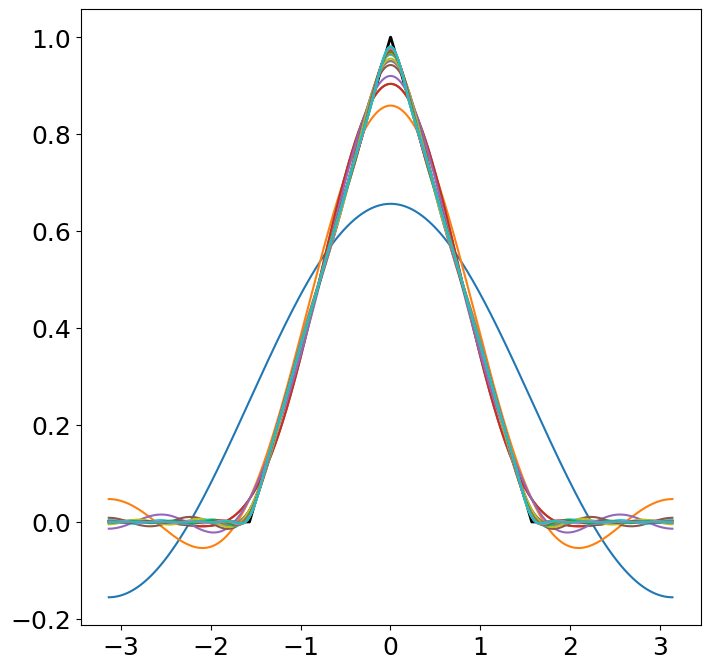

In [5]:
"""
These  demos are directly from the book:
Data Driven Science & Engineering: Machine Learning, Dynamical Systems, and Control
by S. L. Brunton and J. N. Kutz
Cambridge Textbook, 2019
Copyright 2019, All Rights Reserved
The Python code library was prepared by Daniel Dylewsky
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
# Define domain and function to be approximated by Fourier series
dx = 0.001
L = np.pi # Length of the domain
x = L * np.arange(-1+dx,1+dx,dx) # Domain
n = len(x) # Number of points in the domain
nquart = int(np.floor(n/4)) # Index for the first quart of the points
# Define hat function 
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1) # Linear increase from 0 to 1 
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart) # Linear decrease from 1 to 0 
# Plot the hat function 
fig, ax = plt.subplots() 
ax.plot(x,f,'-',color='k',linewidth=2)
# Compute Fourier series 
name = "Accent" # Color map name
cmap = get_cmap('tab10') # Color map
colors = cmap.colors
ax.set_prop_cycle(color=colors)
A0 = np.sum(f * np.ones_like(x)) * dx # Compute A0 which is the average of f for cosine(0) term 
fFS = A0/2 # Start fFS with the constant term A0/2 
# Compute the coefficients A and B for the Fourier series 
A = np.zeros(20) # Initialize A and B 
B = np.zeros(20) # Coefficients for cosine and sine terms 
for k in range(20): # Loop over k and compute A and B through approximation 
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx # Inner product
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L) # Add the kth term to the approximation
    ax.plot(x,fFS,'-') # Plot the current approximation

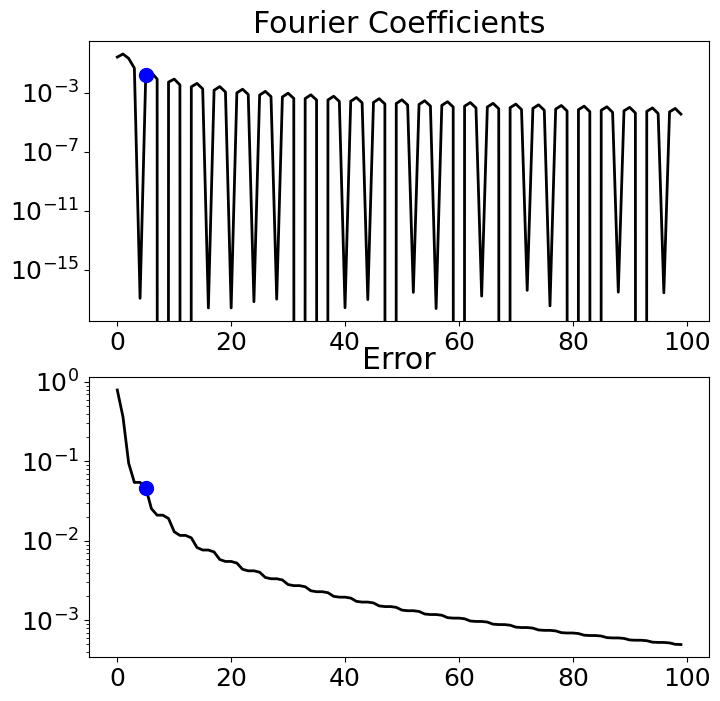

In [7]:
"""
These  demos are directly from the book:
Data Driven Science & Engineering: Machine Learning, Dynamical Systems, and Control
by S. L. Brunton and J. N. Kutz
Cambridge Textbook, 2019
Copyright 2019, All Rights Reserved
The Python code library was prepared by Daniel Dylewsky
"""
## Plot amplitudes which are the a_k and b_k    
fFS = (A0/2) * np.ones_like(f) # Start fFS with the constant term A0/2
kmax = 100 # Number of terms in the Fourier series 
A = np.zeros(kmax) # Initialize vector of Fourier coefficients
B = np.zeros(kmax) # Initialize vector of Fourier coefficients
ERR = np.zeros(kmax) # Initialize vector of errors
A[0] = A0/2 # Compute A0 which is the average of f for cosine(0) term 
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f) # Compute error for zero terms
for k in range(1,kmax): # Loop over k and compute A and B through approximation 
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx # Inner product
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L) # Add the kth term to the approximation
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f) # Compute error for k terms
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3)) # Compute threshold for error 
r = np.max(np.where(ERR > thresh)) # Find the number of terms that exceed the threshold
fig, axs = plt.subplots(2,1) # Create figure with two subplots
axs[0].semilogy(np.arange(kmax),A,color='k',linewidth=2) # Plot amplitudes
axs[0].semilogy(r,A[r],'o',color='b',markersize=10) # Highlight amplitudes that exceed threshold
plt.sca(axs[0]) # Set current axis
plt.title('Fourier Coefficients') # Title for the plot
axs[1].semilogy(np.arange(kmax),ERR,color='k',linewidth=2)  # Plot error
axs[1].semilogy(r,ERR[r],'o',color='b',markersize=10) # Highlight error that exceed threshold
plt.sca(axs[1]) # Set current axis
plt.title('Error') # Title for the plot
plt.show()